# Logistic Regression exercise

# 先设置画图的分辨率、大小等信息

In [52]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (15., 6.) # 设置figure_size的尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置插值风格
plt.rcParams['image.cmap'] = 'gray' # 设置颜色style

# 保证ipynb里的都是最新版本，在修改了模块代码后不用重新刷新kenel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
data = pd.read_csv('./datasets/MNIST.csv',header=0).values # 文件的第0行为列索引
imgs = data[0::,1::] # 从第1行第2列开始的所有数据
labels = data[::,0] # 第一列的所有数据为label

10


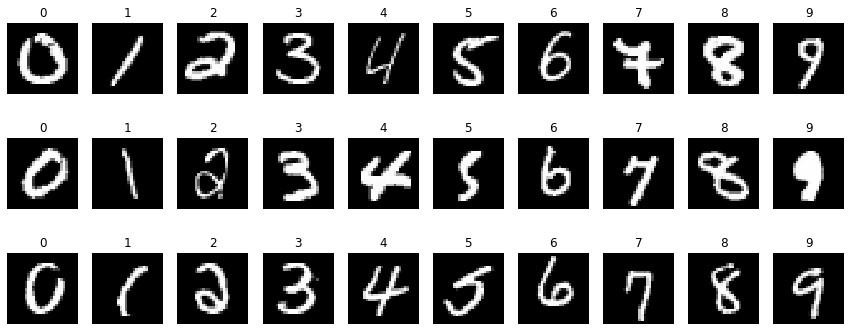

In [54]:
classes = range(10)
num_classes = len(classes)
samples_per_class =3
for y, cls in enumerate(classes): # 采用枚举的方式循环
    idxs = np.flatnonzero(labels == y) # 找到值为y的label的位置
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1 # 在每次循环中找到idx中相应的y/label的位置
        plt.subplot(samples_per_class, num_classes, plt_idx)
        # print(plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        plt.title(cls)
print(num_classes)
plt.show()

# Binary classification
We use the Logistic Regression to classification handwritten digits wheather it's zero or not. If the handwritten digits is '0' , then the label is 0, otherwise, the label is 1.

In [55]:
from bitstring import xrange

# transform the labels to binary
for i in xrange(len(labels)): # 循环遍历42000个label
    if labels[i] != 0:
        labels[i] = 1


split_index = len(labels) * 2 // 3 # 取整，相除

X_train = imgs[:split_index] # 从开头到整个数据集的2/3处，用于训练
y_train = labels[:split_index]

X_test = imgs[split_index:] # 从2/3处到1的数据集，用于测试
y_test = labels[split_index:]

'''
例如，在生成“X_train”的过程中
ones()函数负责生成(28000,1)的矩阵 
X_train()负责将(28000,784)与(28000,1) merging into the matrix of(28000,785)
'''
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]) 
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print (X_train.shape)
print (X_test.shape)

(28000, 785)
(14000, 785)


In [56]:

X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)


[[-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 ...
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]
 [-0.42419887 -0.42419887 -0.42419887 ... -0.42419887 -0.42419887
  -0.41147529]]
——————————————————————————————————————————————————————————————
[[-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 ...
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.42459107 ... -0.42459107 -0.42459107
  -0.41188779]
 [-0.42459107 -0.42459107 -0.424591

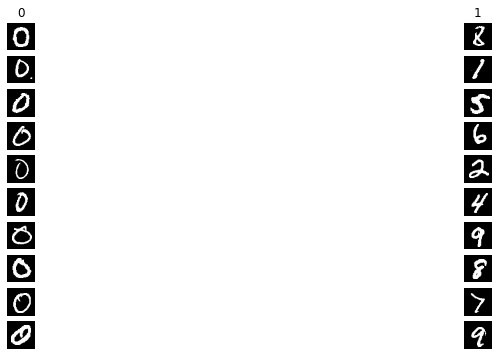

In [57]:
classes = range(2)
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(labels == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(imgs[idx].reshape(28,28).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [58]:
from classifiers.logistic_regression import LogisticRegression

# Start training. 

classifier = LogisticRegression()
loss_history = classifier.train(
    X_train_feats, 
    y_train,
    learning_rate = 0.1,
    num_iters = 150,
    batch_size = 300, # 每次训练的数量，此数值越大，图像的方差越小
)

训练后最终的的损失情况是： 0.699739
训练后最终的的损失情况是： 0.022659


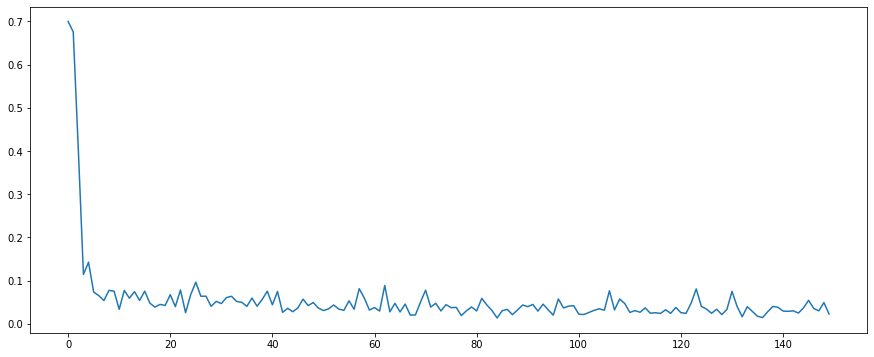

In [59]:
plt.plot(loss_history)

In [60]:
y_test_pred = classifier.predict(X_test_feats)
print("准确率是：", np.mean(y_test == y_test_pred))

准确率是： 0.9899285714285714



### 准确度评估测试


In [61]:

TP = 0.0
FP = 0.0
FN = 0.0
TN = 0.0

#计算ture position，即成功将结果分类出来的数量
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 0:
        TP += 1.0

#计算false position，即结果错判成想要的结果的数量
for it in range(785):
    if y_test_pred[it] == 0 and y_test[it] == 1:
        FP += 1.0

#计算非想要的结果，判错的数量
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 0:
        FN += 1.0

#计算非想要的结果正确分出来的数量
for it in range(785):
    if y_test_pred[it] == 1 and y_test[it] == 1:
        TN += 1.0
    
precision = TP /(TP + FP)

recall = TP / (TP + FN)
    
print(precision)
print(recall)
print('F1:', precision*recall*2/(precision+recall))

0.9555555555555556
0.9885057471264368
F1: 0.9717514124293786


# 多分类


In [62]:
# 同上
data = pd.read_csv('./datasets/MNIST.csv',header=0).values 
imgs = data[0::,1::]
labels = data[::,0]
        

split_index = len(labels) * 2 // 3
X_train = imgs[:split_index]
y_train = labels[:split_index]
X_test = imgs[split_index:]
y_test = labels[split_index:]

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(28000, 785)
(28000,)
(14000, 785)


In [63]:
X_train_feats = (X_train - np.mean(X_train)) / np.std(X_train)
X_test_feats = (X_test - np.mean(X_test)) / np.std(X_test)

In [67]:

classifier = LogisticRegression()
loss_history_servel = classifier.one_vs_all(
    X_train_feats, 
    y_train,
    learning_rate = 0.1,
    num_iters = 150,
    batch_size = 300,
    verbose = False
)

本次训练的数字是 =  0
损失情况是： 0.700842
损失情况是： 0.056677
本次训练的数字是 =  1
损失情况是： 0.695838
损失情况是： 0.026608
本次训练的数字是 =  2
损失情况是： 0.691415
损失情况是： 0.127335
本次训练的数字是 =  3
损失情况是： 0.687082
损失情况是： 0.112216
本次训练的数字是 =  4
损失情况是： 0.676322
损失情况是： 0.068991
本次训练的数字是 =  5
损失情况是： 0.690777
损失情况是： 0.134178
本次训练的数字是 =  6
损失情况是： 0.688970
损失情况是： 0.046371
本次训练的数字是 =  7
损失情况是： 0.691648
损失情况是： 0.057099
本次训练的数字是 =  8
损失情况是： 0.697810
损失情况是： 0.147127
本次训练的数字是 =  9
损失情况是： 0.682555
损失情况是： 0.114984


(10, 150)


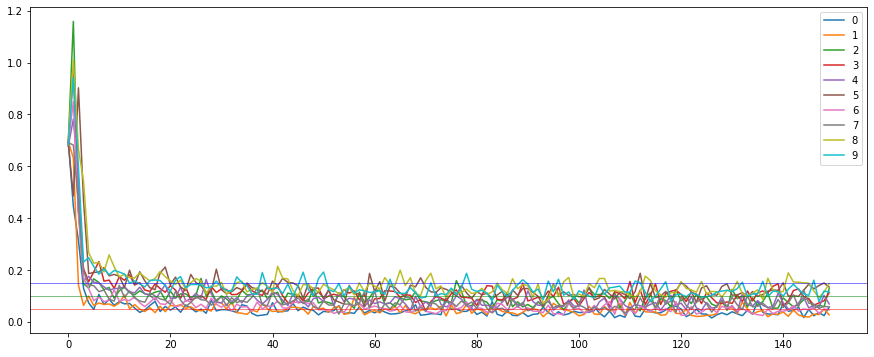

In [73]:
print(loss_history_servel.shape)

plt.plot(loss_history_servel.T)
plt.axhline(0.1,color='green',lw=0.5,label='分割线')
plt.axhline(0.05,color='red',lw=0.5,label='分割线')
plt.axhline(0.15,color='blue',lw=0.5,label='分割线')
plt.legend(('0','1','2','3','4','5','6','7','8','9'))

## 结论
由上图所示，不同的数字在经过训练之后的的准确结果存在一定的差异如：

- 0和1这两个数字的识别准确率相对较高，基本可以稳定在95%以上的TP

- 2,3,4,6,7的TP值在90%左右

- 5,8,9的TP效果则相对比较低，稳定在85%~90%之间

In [68]:
y_test_pred = classifier.one_vs_all_predict(X_test_feats)
print( "最终的准确率是：", np.mean(y_test == y_test_pred))

最终的准确率是： 0.8953571428571429
